# IMPORT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# READ DATA

In [ ]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/Projects/Crop/Crop_recommendation (1).csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
data1=data.iloc[:,-1]
data1.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# DATA PREPROCESS

## Data cleaning

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Data correlaction

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-6-d4ab4206d394>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1,cmap="YlGnBu",annot_kws={"size":20})


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'N'),
  Text(0, 1.5, 'P'),
  Text(0, 2.5, 'K'),
  Text(0, 3.5, 'temperature'),
  Text(0, 4.5, 'humidity'),
  Text(0, 5.5, 'ph'),
  Text(0, 6.5, 'rainfall')])

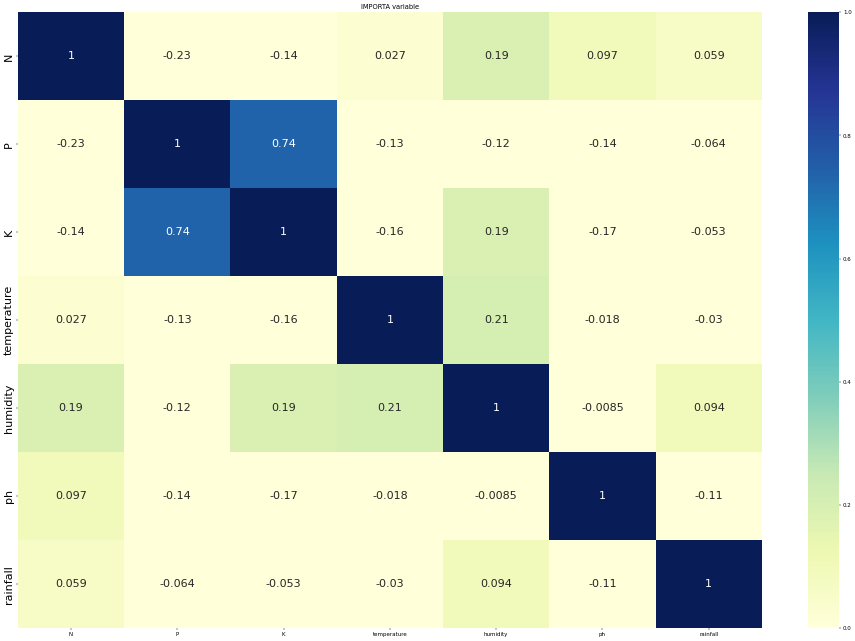

In [ ]:
plt.figure(figsize=(30,20),dpi=40)
sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1,cmap="YlGnBu",annot_kws={"size":20})
plt.title("IMPORTA variable")
plt.yticks(fontsize=20)

# SPLIT FEATURES AND LABEL

In [ ]:
x=data.iloc[:,0:7]
y=data.iloc[:,-1]
print(x)
print(y)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


# SPLIT TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# KNN ALGORITHM

## FIND K VALUE

In [ ]:
import numpy as np
k=int((np.sqrt(len(xtrain)))/2)
if k%2 == 0:
  k=(k+1)

In [ ]:
k

21

## IMPORT KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## DEVELOP MODEL

In [ ]:
knmodel=KNeighborsClassifier(n_neighbors=9)

## TRAIN MODEL

In [ ]:
model=knmodel.fit(xtrain,ytrain)

## VALIDATE MODEL

In [ ]:

ypred=model.predict(xtest)

In [ ]:
ypred


array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'blackgram', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [ ]:
print(type(ytest))


<class 'pandas.core.series.Series'>


In [ ]:
print(type(ypred))


<class 'numpy.ndarray'>


In [ ]:
print(type(ytest))

<class 'pandas.core.series.Series'>


In [ ]:
ytest


1320    watermelon
1367    watermelon
1291        grapes
264       chickpea
728      blackgram
           ...    
446     pigeonpeas
1005        banana
1919        cotton
708      blackgram
1546         apple
Name: label, Length: 440, dtype: object

In [ ]:
df=pd.DataFrame()
df["Actual Result"]=ytest
df["Predicted Result"]=ypred
df

,Actual Result,Predicted Result
1320,watermelon,watermelon
1367,watermelon,watermelon
1291,grapes,grapes
264,chickpea,chickpea
728,blackgram,blackgram
...,...,...
446,pigeonpeas,pigeonpeas
1005,banana,banana
1919,cotton,cotton
708,blackgram,blackgram


# LR

## IMPORT LR

In [ ]:
from sklearn.linear_model import LogisticRegression

## DEVELOP MODEL

In [ ]:
model = LogisticRegression()


## TRAIN MODEL

In [ ]:
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## TEST MODEL

In [ ]:
ypredlr=model.predict(xtest)

In [ ]:
print(type(ytest))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(ypredlr))

<class 'numpy.ndarray'>


In [ ]:
lrresult=confusion_matrix(ytest,ypredlr)
lrresult

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  2,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

Text(50.722222222222214, 0.5, 'ActualCrop')

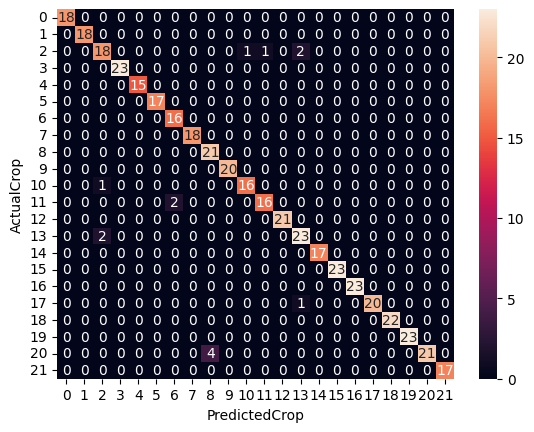

In [ ]:
ax=plt.subplot()
lrconfusiontable=sns.heatmap(lrresult,annot=True)
plt.xlabel('PredictedCrop')
plt.ylabel('ActualCrop')

# MODEL VALIDATION FOR LR


In [ ]:
LRAccuracy=(metrics.accuracy_score(ytest,ypredlr))
LRAccuracy

0.9681818181818181

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
lrreport=(classification_report(ytest, ypredlr, output_dict=True))
lrreport

{'apple': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'banana': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'blackgram': {'precision': 0.8571428571428571,
  'recall': 0.8181818181818182,
  'f1-score': 0.8372093023255814,
  'support': 22},
 'chickpea': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 'coconut': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15},
 'coffee': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 'cotton': {'precision': 0.8888888888888888,
  'recall': 1.0,
  'f1-score': 0.9411764705882353,
  'support': 16},
 'grapes': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'jute': {'precision': 0.84,
  'recall': 1.0,
  'f1-score': 0.9130434782608696,
  'support': 21},
 'kidneybeans': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 20},
 'lentil': {'precision': 0.9411764705882353,
  'recall': 0.9411764705882353,
  'f1-score': 0.9411

In [ ]:
lr_precision =  lrreport['macro avg']['precision']
lr_recall = lrreport['macro avg']['recall']
lr_f1 = lrreport['macro avg']['f1-score']

# MODEL VALIDATION FOR KNN



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
knnresult=confusion_matrix(ytest,ypred)
knnresult

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

Text(50.722222222222214, 0.5, 'ActualCrop')

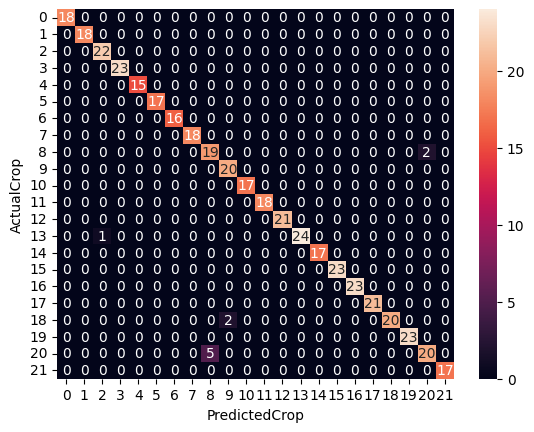

In [ ]:
ax=plt.subplot()
knnconfusiontable=sns.heatmap(knnresult,annot=True)
plt.xlabel('PredictedCrop')
plt.ylabel('ActualCrop')

In [ ]:
from sklearn import metrics

In [ ]:
KNNAccuracy=(metrics.accuracy_score(ytest,ypred))

In [ ]:
KNNAccuracy

0.9772727272727273

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knnreport=(classification_report(ytest, ypred, output_dict=True))
knnreport

{'apple': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'banana': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'blackgram': {'precision': 0.9565217391304348,
  'recall': 1.0,
  'f1-score': 0.9777777777777777,
  'support': 22},
 'chickpea': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 'coconut': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15},
 'coffee': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 'cotton': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'grapes': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'jute': {'precision': 0.7916666666666666,
  'recall': 0.9047619047619048,
  'f1-score': 0.8444444444444444,
  'support': 21},
 'kidneybeans': {'precision': 0.9090909090909091,
  'recall': 1.0,
  'f1-score': 0.9523809523809523,
  'support': 20},
 'lentil': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 'maize': {

In [ ]:
knn_precision =  knnreport['macro avg']['precision']
knn_recall = knnreport['macro avg']['recall']
knn_f1 = knnreport['macro avg']['f1-score']

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svmmodel=SVC(kernel='linear')

In [ ]:
svmmodel.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
ypredsvm=svmmodel.predict(xtest)

In [ ]:
SVMresult=confusion_matrix(ytest,ypredsvm)
SVMresult

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

Text(50.722222222222214, 0.5, 'ActualCrop')

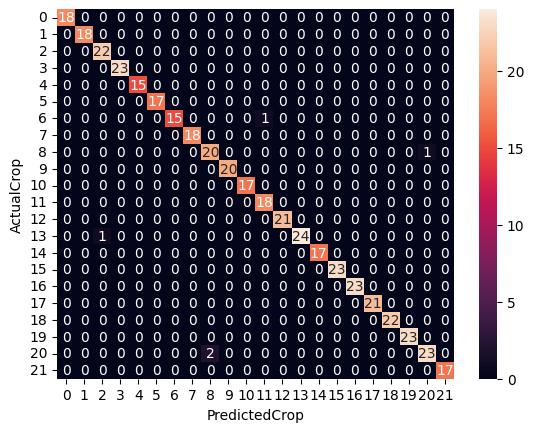

In [ ]:
ax=plt.subplot()
svmconfusiontable=sns.heatmap(SVMresult,annot=True)
plt.xlabel('PredictedCrop')
plt.ylabel('ActualCrop')

In [ ]:
SVMAccuracy=(metrics.accuracy_score(ytest,ypredsvm))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
SVMreport=(classification_report(ytest, ypredsvm, output_dict=True))
SVMreport

{'apple': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'banana': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'blackgram': {'precision': 0.9565217391304348,
  'recall': 1.0,
  'f1-score': 0.9777777777777777,
  'support': 22},
 'chickpea': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 'coconut': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15},
 'coffee': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 'cotton': {'precision': 1.0,
  'recall': 0.9375,
  'f1-score': 0.967741935483871,
  'support': 16},
 'grapes': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18},
 'jute': {'precision': 0.9090909090909091,
  'recall': 0.9523809523809523,
  'f1-score': 0.9302325581395349,
  'support': 21},
 'kidneybeans': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 20},
 'lentil': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 'maize': {'precis

In [ ]:
svm_precision =  SVMreport['macro avg']['precision']
svm_recall = SVMreport['macro avg']['recall']
svm_f1 = SVMreport['macro avg']['f1-score']

In [ ]:
df = pd.DataFrame({'Method/Metrics':['Accuracy','Precision','Recall','F1-Score'],
                   'LR':[LRAccuracy*100,lr_precision*100,lr_recall*100,lr_f1*100],
                   'KNN':[KNNAccuracy*100,knn_precision*100,knn_recall*100,knn_f1*100],
                   'SVM':[SVMAccuracy*100,svm_precision*100,svm_recall*100,svm_f1*100]
                   })

df

,Method/Metrics,LR,KNN,SVM
0,Accuracy,96.818182,97.727273,98.863636
1,Precision,97.059091,98.028956,98.960520
2,Recall,97.093764,98.062967,98.954004
3,F1-Score,96.988661,97.989272,98.941330


Text(0.5, 1.0, 'COMPARISON OF ML MODEL')

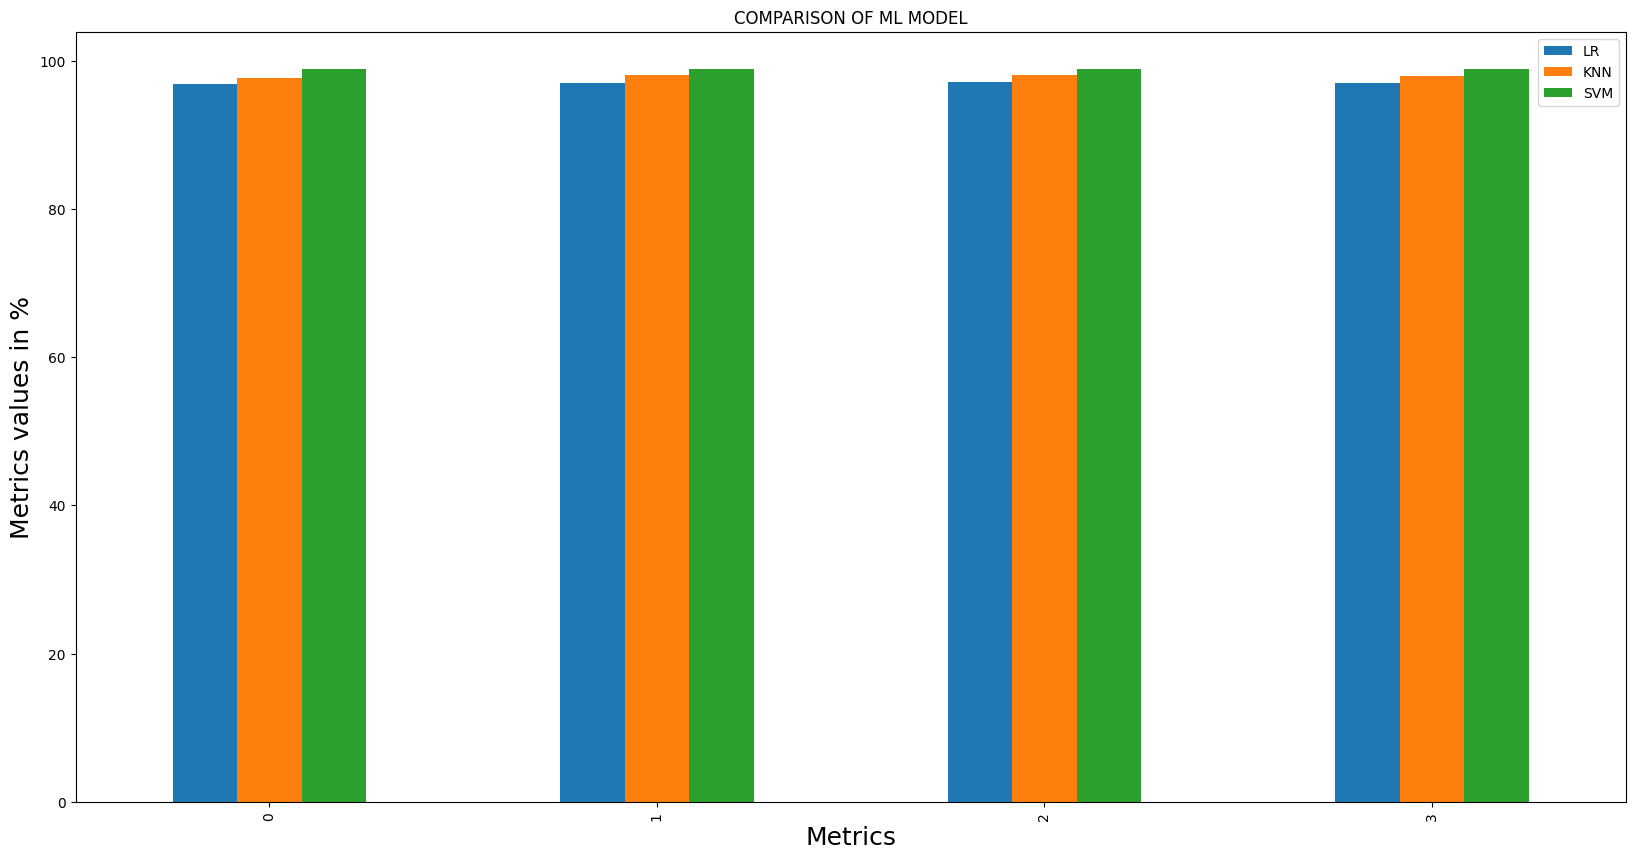

In [ ]:
df.plot.bar(figsize=(20,10))
plt.xlabel('Metrics',fontsize=18)
plt.ylabel('Metrics values in %',fontsize=18)
plt.title('COMPARISON OF ML MODEL')

In [ ]:
import joblib
joblib.dump(svmmodel,'svmMODEL.h5')

['svmMODEL.h5']

In [ ]:
my_model=joblib.load('svmMODEL.h5')

In [ ]:
import numpy as np
x = np.array([90.0, 42.0, 43.0, 20.879744, 82.002744, 6.502985, 202.935536])
print(x.shape)
x = x.reshape(1, -1)


(7,)


In [ ]:
Ypredm=my_model.predict(x)
Ypredm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['rice'], dtype=object)